In [ ]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice

class AntColony2(object):

    def __init__(self, distances, n_ants, n_cities, q0,  n_iterations, timelimit, decay=0.5, alpha=1, beta=5, Q=100, n_best=5, opt=False):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
        """
 
      
        self.timelimit = timelimit
        self.opt = opt
        self.distances  = distances
        self.q0 = q0
        self.n_cities = n_cities
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.Q = Q

        # keeps track of length shortest path
        self.history = []  #np.zeros(n_iterations)
        self.timestamps = []
        
    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        while time.time() - time_start < self.timelimit:
            all_paths = self.gen_all_paths()

            # Attempt at 2-opt, incomplete
            if(self.opt == True):
              #print("local search")
              #print(all_paths[1:7])
              for k in range(len(all_paths)):
                all_paths[k] = self.two_opt(all_paths[k])
              #print()
              #print()
              #print(all_paths[1:7])

            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path     
            self.pheromone * self.decay    
            self.spread_pheronome(all_paths, shortest_path=shortest_path)
            # keep track of length shortest path


            self.timestamps.append(time.time() - time_start)
            self.history.append(all_time_shortest_path[1])  #[i] = all_time_shortest_path[1]
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, shortest_path):
        # Only applies when there is no elitism at all, can be disregarded if program set correctly.
        if self.n_best is None:
            for path, dist in all_paths:
                for move in path:
                    self.pheromone[move] += self.Q/dist

        else:
            # Only spread pheromones on the n_best tours
            # Note this is spreading the pheromone equally, without weights. This should still be implemented to be a complete Rank-Based Ant System algorithm.
            sorted_paths = sorted(all_paths, key=lambda x: x[1])
            for path, dist in sorted_paths[:self.n_best]:
                for move in path:
                    self.pheromone[move] += self.Q/dist

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set() # tabu list
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started    
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0 # tabu list
        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)
        norm_row = row / row.sum() 
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move

    # 2-opt
    #code van https://stackoverflow.com/questions/53275314/2-opt-algorithm-to-solve-the-travelling-salesman-problem-in-python
    
    # Not fully implemented, can be disregarded
    def two_opt(self, route):
        best = [edge[0] for edge in route[0]]
        improved = True
        while improved:
            improved = False
            for i in range(1, len(route) - 3):
                for j in range(i + 2, len(route)):
                    if j - i == 1: continue
                    #print(best[i - 1])
                    #print(best[i])
                    #print(best[j - 1])
                    #print(best[j])
                    if self.cost_change(best[i - 1], best[i], best[j - 1], best[j]) < 0:
                        best[i:j] = best[j - 1:i - 1:-1]
                        improved = True
            route = best
        new_route = list(zip(best, best[1:]))
        new_route.append((new_route[-1][1], new_route[0][0]))  # 0  begin stad 
        
        new_route = (new_route, self.gen_path_dist(new_route))
        return new_route

    def cost_change(self, n1, n2, n3, n4):
        return self.distances[n1][n3] + self.distances[n2][n4] - self.distances[n1][n2] - self.distances[n3][n4]


In [ ]:
# Mount Google Drive to fetch data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/Natural computing/rowan/ant_colony.py"

cp: missing destination file operand after '/content/drive/My Drive/Natural computing/rowan/ant_colony.py'
Try 'cp --help' for more information.


In [ ]:
!pip install tsplib95

In [ ]:
import tsplib95
import networkx
import numpy as np
import time
import matplotlib.pyplot as plt

from numpy import savetxt
from numpy import loadtxt

In [ ]:
 # Change this path to be appropriate to the Google Drive location of your TSP problems
TSP_PATH  = "/content/drive/My Drive/Natural computing/tsp/"

In [ ]:
def load_tsp(tsp_name): 
  problem = tsplib95.load(TSP_PATH+ tsp_name + ".tsp")
  # convert into a networkx.Graph
  graph = problem.get_graph()
  # convert into a numpy distance matrix
  distance_matrix = np.asarray(networkx.to_numpy_matrix(graph))
  # Change diagonal to np.inf, this is needed in order to use ant_colony.py
  np.fill_diagonal(distance_matrix,  np.inf)
  return distance_matrix

def show_history(history, timestamps):
  '''
  history (numpy.array): Array with history of shortest path length found
  '''
  plt.figure()
  plt.plot(timestamps, history)
  plt.xlabel("time elapsed")
  plt.ylabel("Distance")

In [ ]:
# Change this to be the name of your TSP problem, saved in your Google Drive
tsp = load_tsp("eil101")

Done in 720.07s
shorted_path: [1, 69, 27, 101, 53, 58, 40, 21, 73, 72, 74, 22, 41, 75, 56, 39, 23, 67, 25, 55, 4, 54, 24, 29, 80, 68, 77, 3, 79, 33, 81, 51, 9, 78, 34, 35, 71, 65, 66, 20, 30, 70, 31, 88, 7, 82, 48, 47, 36, 49, 64, 63, 90, 32, 10, 62, 11, 19, 46, 8, 45, 17, 84, 5, 60, 83, 18, 52, 89, 6, 94, 95, 97, 92, 59, 99, 96, 93, 85, 91, 100, 37, 98, 61, 16, 86, 38, 44, 14, 42, 43, 15, 57, 2, 87, 13, 28, 26, 12, 76, 50]
Length path: 657.0
Done in 720.69s
shorted_path: [1, 69, 27, 101, 53, 58, 40, 26, 12, 80, 68, 77, 3, 79, 33, 81, 9, 51, 20, 30, 70, 31, 88, 7, 62, 10, 90, 63, 11, 19, 47, 48, 82, 8, 83, 60, 5, 84, 17, 61, 16, 86, 44, 14, 38, 43, 15, 57, 2, 21, 73, 72, 74, 22, 41, 75, 56, 23, 67, 39, 4, 25, 55, 54, 24, 29, 78, 34, 35, 71, 65, 66, 32, 64, 49, 36, 46, 45, 18, 52, 89, 6, 94, 95, 97, 92, 59, 99, 96, 93, 85, 91, 100, 98, 37, 42, 87, 13, 28, 76, 50]
Length path: 678.0
Done in 720.33s
shorted_path: [1, 50, 76, 77, 3, 79, 78, 34, 81, 33, 51, 9, 71, 35, 65, 66, 20, 30, 70, 31

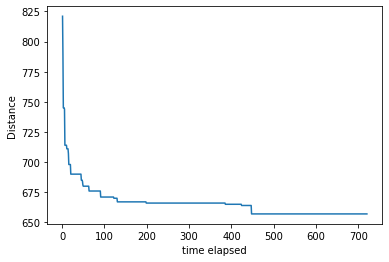

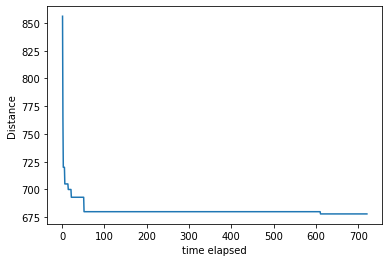

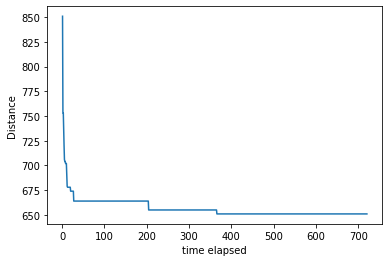

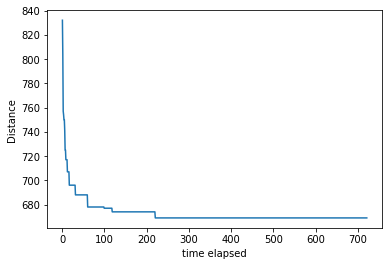

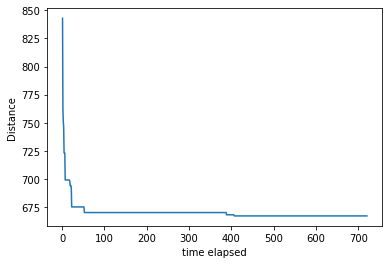

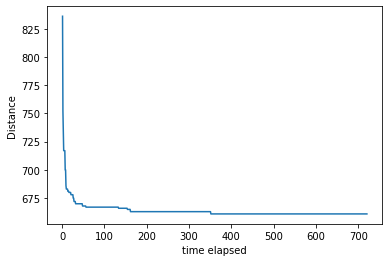

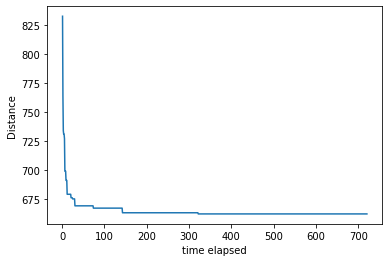

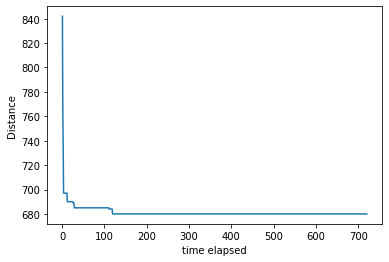

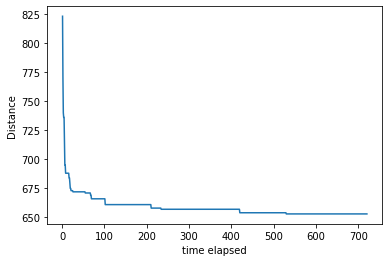

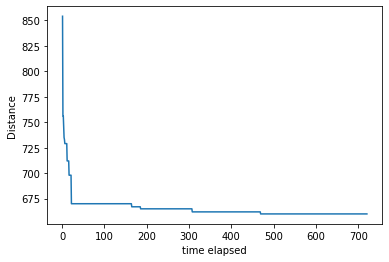

In [ ]:
all_history = []
all_timestamps = [] 

# Run the algorithm, get data.
for i in range(10):
  # Make sure to leave opt at False, as it is not fully implemented.
  # Change n_best to whatever you want your best-ants-that-can-drop-pheromone group-size to be.
  # Make sure to change n_ants to be equal to the amount of cities your TSP problem has.
  # The timelimit should be changed to be appropriate to the TSP.
  ant_colony = AntColony2(tsp, n_ants=101, n_cities=0, q0 = 0.5, n_iterations=100, opt = False, n_best = 5, timelimit = 720)

  time_start = time.time()
  shortest_path3, length = ant_colony.run()
  time_end = time.time()

  all_history.append(ant_colony.history)
  all_timestamps.append(ant_colony.timestamps)

  print("Done in %.2fs" % (time_end - time_start,))
  shortest_path = [edge[0]+1 for edge in shortest_path3]
  print ("shorted_path: {}".format(shortest_path))
  print("Length path: {}".format(length))
  show_history(ant_colony.history, ant_colony.timestamps)

In [ ]:
pad = len(max(all_history, key=len))
to_save_history =  np.array([i + [0]*(pad-len(i)) for i in all_history])
to_save_timestamps = np.array([i + [0]*(pad-len(i)) for i in all_timestamps])

savetxt('eil101ASR_history.csv', to_save_history, delimiter=',')
savetxt('eil101ASR_timestamps.csv', to_save_timestamps, delimiter=',')